For my study, I chose the 2016-2017 School safety report from NYC open data website. Link to the source: https://data.cityofnewyork.us/Education/2016-2017-School-Safety-Report/rear-wh5i
New York city police department is tasked with collection and maintenance of crime data for incidents that occur in New York City public schools. The NYPD has provided this data to the New York City Department of Education (DOE) and DOE has compiled this data by schools and locations for the information of the general public. 

A brief description of the dataset: 

This data set has 33 columns and 2046 rows

Variables I chose for analysis are - Borough, Major N, Oth N, NoCrim N, Prop N, Vio N. 

My 'target' is Borough and Major N, Oth N, NoCrim N, Prop N, Vio N are 'features' 
My aim for this study is to identify trends in the total crimes with respect to each Borough. If there is a trend, what sort of crimes occur the most - violent crimes, non-criminal cases, property crimes or other crimes. Find any anomalies if any


# Step 1

In [2]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import yellowbrick

import warnings
warnings.filterwarnings('ignore')

Importing CSV file and checking the shape of dataset

In [3]:
ssr = pd.read_csv("2016_-_2017_School_Safety_Report.csv")



# Step 2

In [4]:
print("Number of Rows in dataset: ", len(ssr.axes[0]))
print("Number of Columns in dataset: ", len(ssr.axes[1]))




Number of Rows in dataset:  2046
Number of Columns in dataset:  33


# Step 3

Displaying head of the dataset for preview

In [5]:
ssr.head()

,School Year,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,NYPD Site Code,NYPD Site Name,...,Geocode,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2016 - 17,PASSAGES ACADEMY AT BELMONT(BN),X695,K,7,618.0,NaN,1,211.0,PS 077K,...,"560 BROOK AVENUE\n(40.815701, -73.914526)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 - 17,P.S. Q086,Q086,Q,28,646.0,NaN,1,746.0,MS 074Q,...,"87 41 PARSONS BOULEVARD\n(41.12133, -72.339742)",11432.0,40.708898,-73.803938,8.0,24.0,448.0,4438678.0,4.097740e+09,Briarwood-Jamaica Hills ...
2,2016 - 17,P.S. 001 The Bergen,K001,K,15,1334.0,NaN,1,198.0,PS 001K,...,"309 47 STREET\n(41.574857, -93.767342)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016 - 17,P.S. 001 Alfred E. Smith,M001,M,2,533.0,NaN,1,1398.0,Sunset Park HS,...,"8 HENRY STREET\n(41.398617, -73.465855)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016 - 17,P.S. 035,M035,M,2,833.0,NaN,1,663.0,JHS 056M,...,"317 WEST 52ND STREET\n(41.799996, -87.633867)",10019.0,40.763866,-73.985939,4.0,3.0,133.0,1025241.0,1.010430e+09,Clinton ...


# Step 4 

Checking the type of variables

In [6]:
print("Describe Data")
print(ssr.describe())



Describe Data
       Geographical District Code     Register    # Schools  NYPD Site Code  \
count                 2046.000000  2016.000000  2046.000000     1985.000000   
mean                    15.463832   690.715774     2.129521      593.476574   
std                      9.246920   551.252364     1.424322      384.171339   
min                      0.000000    62.000000     1.000000        1.000000   
25%                      8.000000   356.000000     1.000000      295.000000   
50%                     14.000000   527.000000     2.000000      547.000000   
75%                     24.000000   855.000000     3.000000      875.000000   
max                     32.000000  5682.000000     8.000000     1463.000000   

           Major N        Oth N     NoCrim N       Prop N        Vio N  \
count  1211.000000  1211.000000  1211.000000  1211.000000  1211.000000   
mean      0.413708     1.649876     3.570603     0.985962     0.861272   
std       0.870894     2.739601     7.053322     1.6

# Step 5 

Checking summary of the data

In [7]:
print("Summarized Data")
print(ssr.describe(include='all'))

Summarized Data
       School Year      Location Name Location Code Borough  \
count         2046               2046          2046    2046   
unique           1               2036          1861       6   
top      2016 - 17  Â P.S. 93 - BRONX          M868       K   
freq          2046                  3             3     653   
mean           NaN                NaN           NaN     NaN   
std            NaN                NaN           NaN     NaN   
min            NaN                NaN           NaN     NaN   
25%            NaN                NaN           NaN     NaN   
50%            NaN                NaN           NaN     NaN   
75%            NaN                NaN           NaN     NaN   
max            NaN                NaN           NaN     NaN   

        Geographical District Code     Register  \
count                  2046.000000  2016.000000   
unique                         NaN          NaN   
top                            NaN          NaN   
freq                   

# Before plotting visualizations, I have decided to do some modifications to the headers of the data set

Removing spaces and special characters in column headers

In [8]:
ssr.columns = ssr.columns.str.replace('# ', '')
ssr.columns = ssr.columns.str.replace(' ', '_')

Replacing the Borough codes to full names - for better understanding of data

In [9]:
ssr['Borough'] = ssr['Borough'].replace({'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'R': 'Staten Island', 'X': 'Bronx', 'O': 'Other'})



Printing a snapshot of the cleaned dataset

In [10]:
ssr.head()

,School_Year,Location_Name,Location_Code,Borough,Geographical_District_Code,Register,Building_Name,Schools,NYPD_Site_Code,NYPD_Site_Name,...,Geocode,Postcode,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA
0,2016 - 17,PASSAGES ACADEMY AT BELMONT(BN),X695,Brooklyn,7,618.0,NaN,1,211.0,PS 077K,...,"560 BROOK AVENUE\n(40.815701, -73.914526)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 - 17,P.S. Q086,Q086,Queens,28,646.0,NaN,1,746.0,MS 074Q,...,"87 41 PARSONS BOULEVARD\n(41.12133, -72.339742)",11432.0,40.708898,-73.803938,8.0,24.0,448.0,4438678.0,4.097740e+09,Briarwood-Jamaica Hills ...
2,2016 - 17,P.S. 001 The Bergen,K001,Brooklyn,15,1334.0,NaN,1,198.0,PS 001K,...,"309 47 STREET\n(41.574857, -93.767342)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016 - 17,P.S. 001 Alfred E. Smith,M001,Manhattan,2,533.0,NaN,1,1398.0,Sunset Park HS,...,"8 HENRY STREET\n(41.398617, -73.465855)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016 - 17,P.S. 035,M035,Manhattan,2,833.0,NaN,1,663.0,JHS 056M,...,"317 WEST 52ND STREET\n(41.799996, -87.633867)",10019.0,40.763866,-73.985939,4.0,3.0,133.0,1025241.0,1.010430e+09,Clinton ...


# Step 6

Plotting histograms of the number 'Features' of interest - Schools, Major N, Oth N, NoCrim N, Prop N, Vio N.

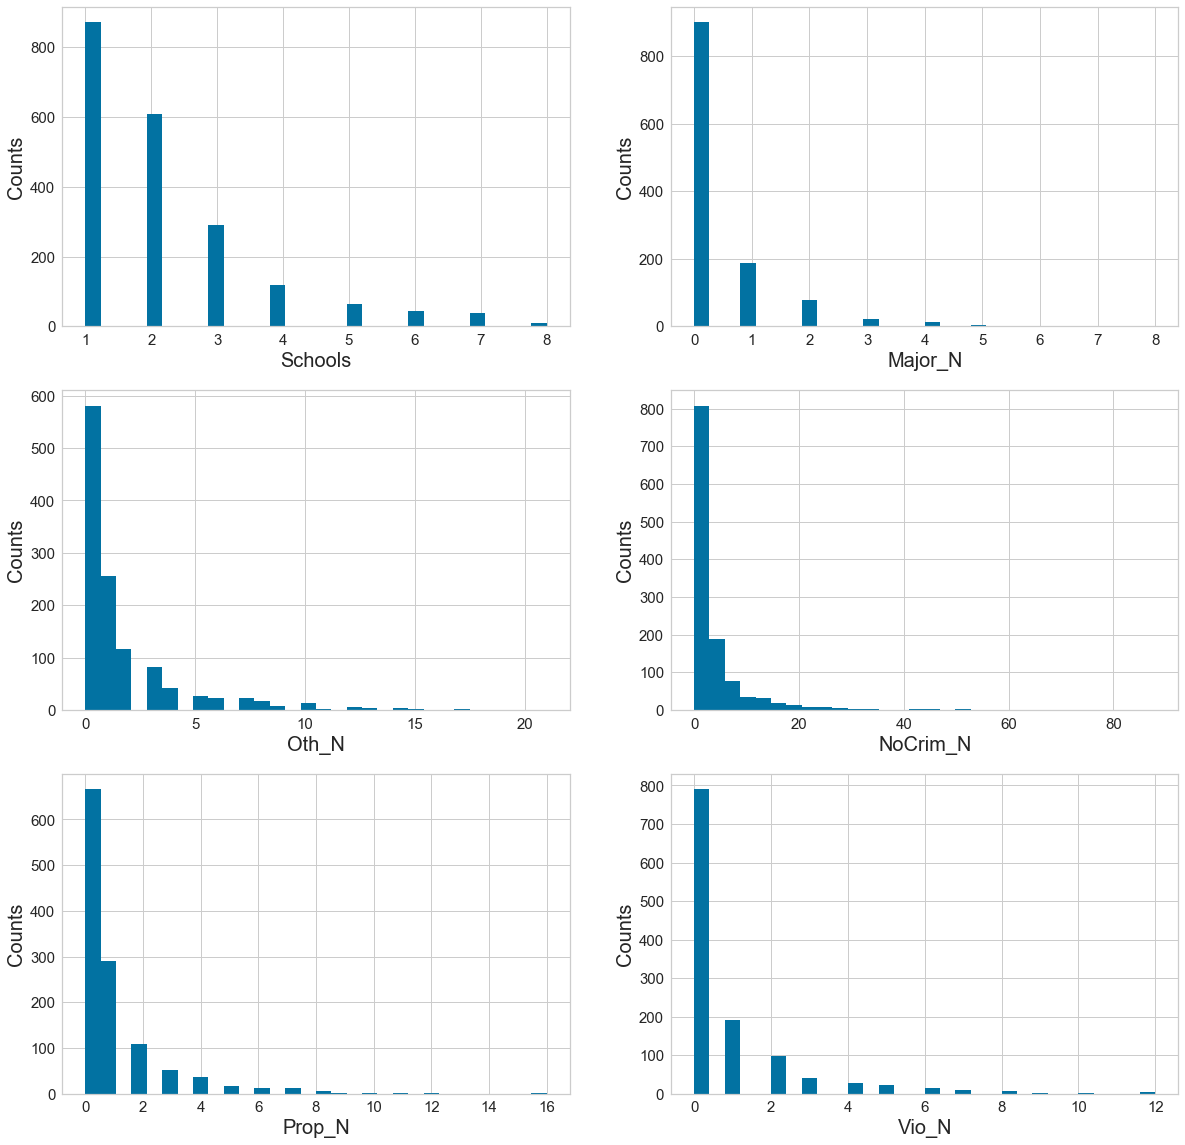

In [11]:
plt.rcParams['figure.figsize'] = (20, 20)
fig, axes = plt.subplots(nrows = 3, ncols = 2)
num_features = ['Schools','Major_N', 'Oth_N', 'NoCrim_N', 'Prop_N', 'Vio_N']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(ssr[num_features[idx]].dropna(), bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)



# Step 7

Making Bar charts to visualize the distribution of 'Borough', 'Register' and 'Schools' columns

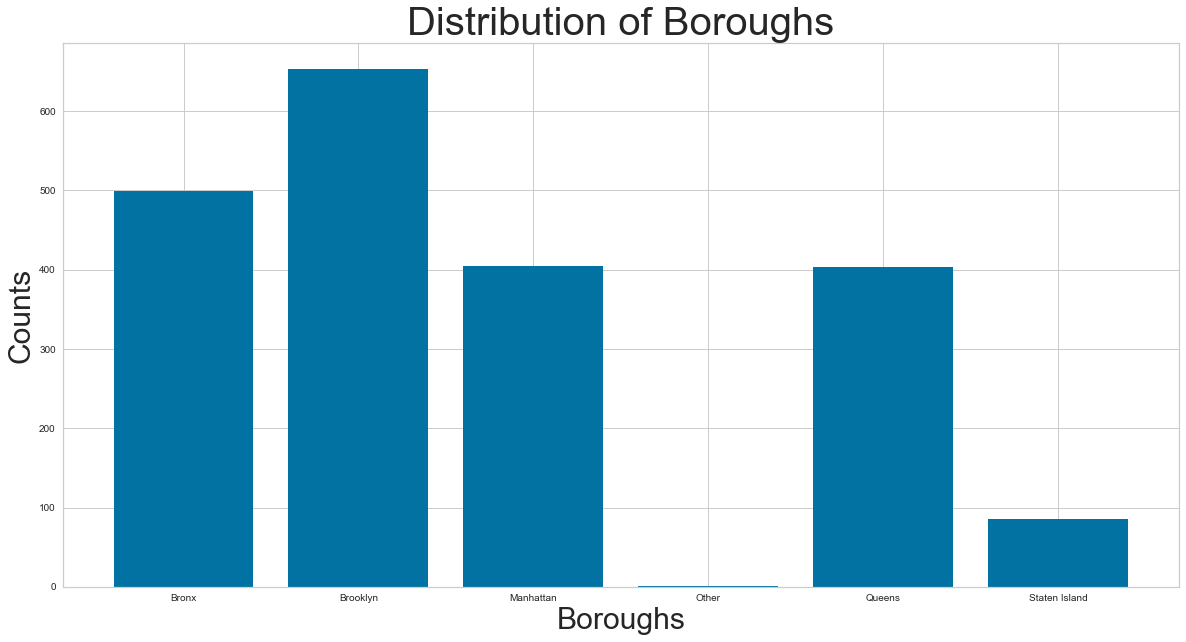

In [12]:
X_Borough = ssr.groupby('Borough').size().reset_index(name='Counts')['Borough']
Y_Borough = ssr.groupby('Borough').size().reset_index(name='Counts')['Counts']

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(X_Borough, Y_Borough)
plt.title('Distribution of Boroughs', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Counts', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

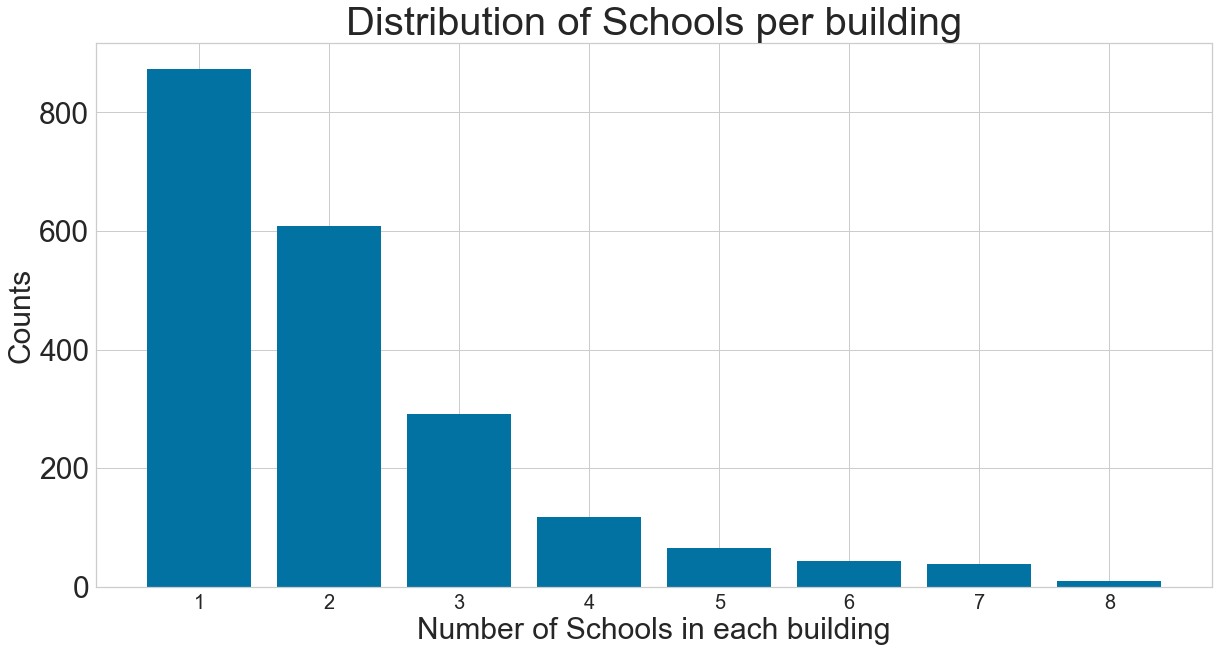

In [13]:
X_school = ssr.groupby('Schools').size().reset_index(name='Counts')['Schools']
Y_school = ssr.groupby('Schools').size().reset_index(name='Counts')['Counts']

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(X_school, Y_school)
plt.title('Distribution of Schools per building', fontsize = 40)
plt.xlabel('Number of Schools in each building', fontsize = 30)
plt.ylabel('Counts', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

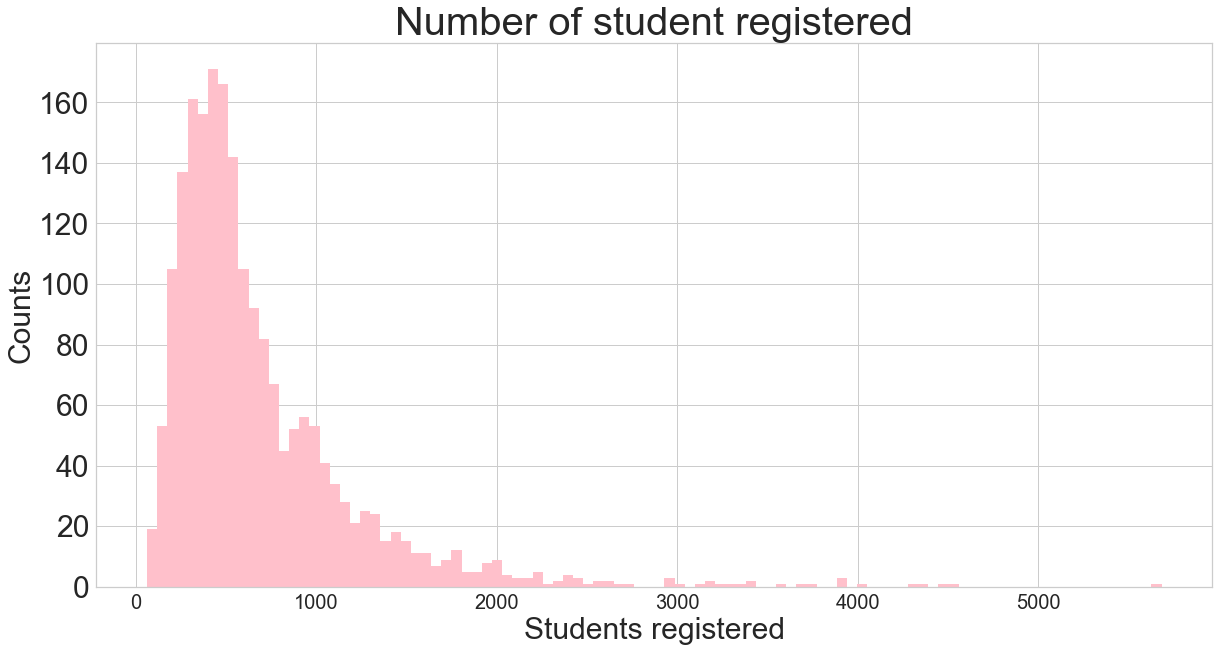

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(ssr.Register, bins = 100, color='pink')
plt.xlabel('Students registered', fontsize = 30)
plt.ylabel('Counts', fontsize = 30)
plt.title("Number of student registered", fontsize = 40)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

plt.show()




# Step 8

Checking the correlation between numeric variables using Pearson Ranking

In [15]:
new_col = ssr[['Major_N', 'Oth_N', 'NoCrim_N', 'Prop_N', 'Vio_N', 'Schools', 'AvgOfMajor_N', 'AvgOfOth_N', 'AvgOfNoCrim_N', 'AvgOfProp_N', 'AvgOfVio_N', 'Geographical_District_Code', 'Register']]
ssr_num = new_col.copy()

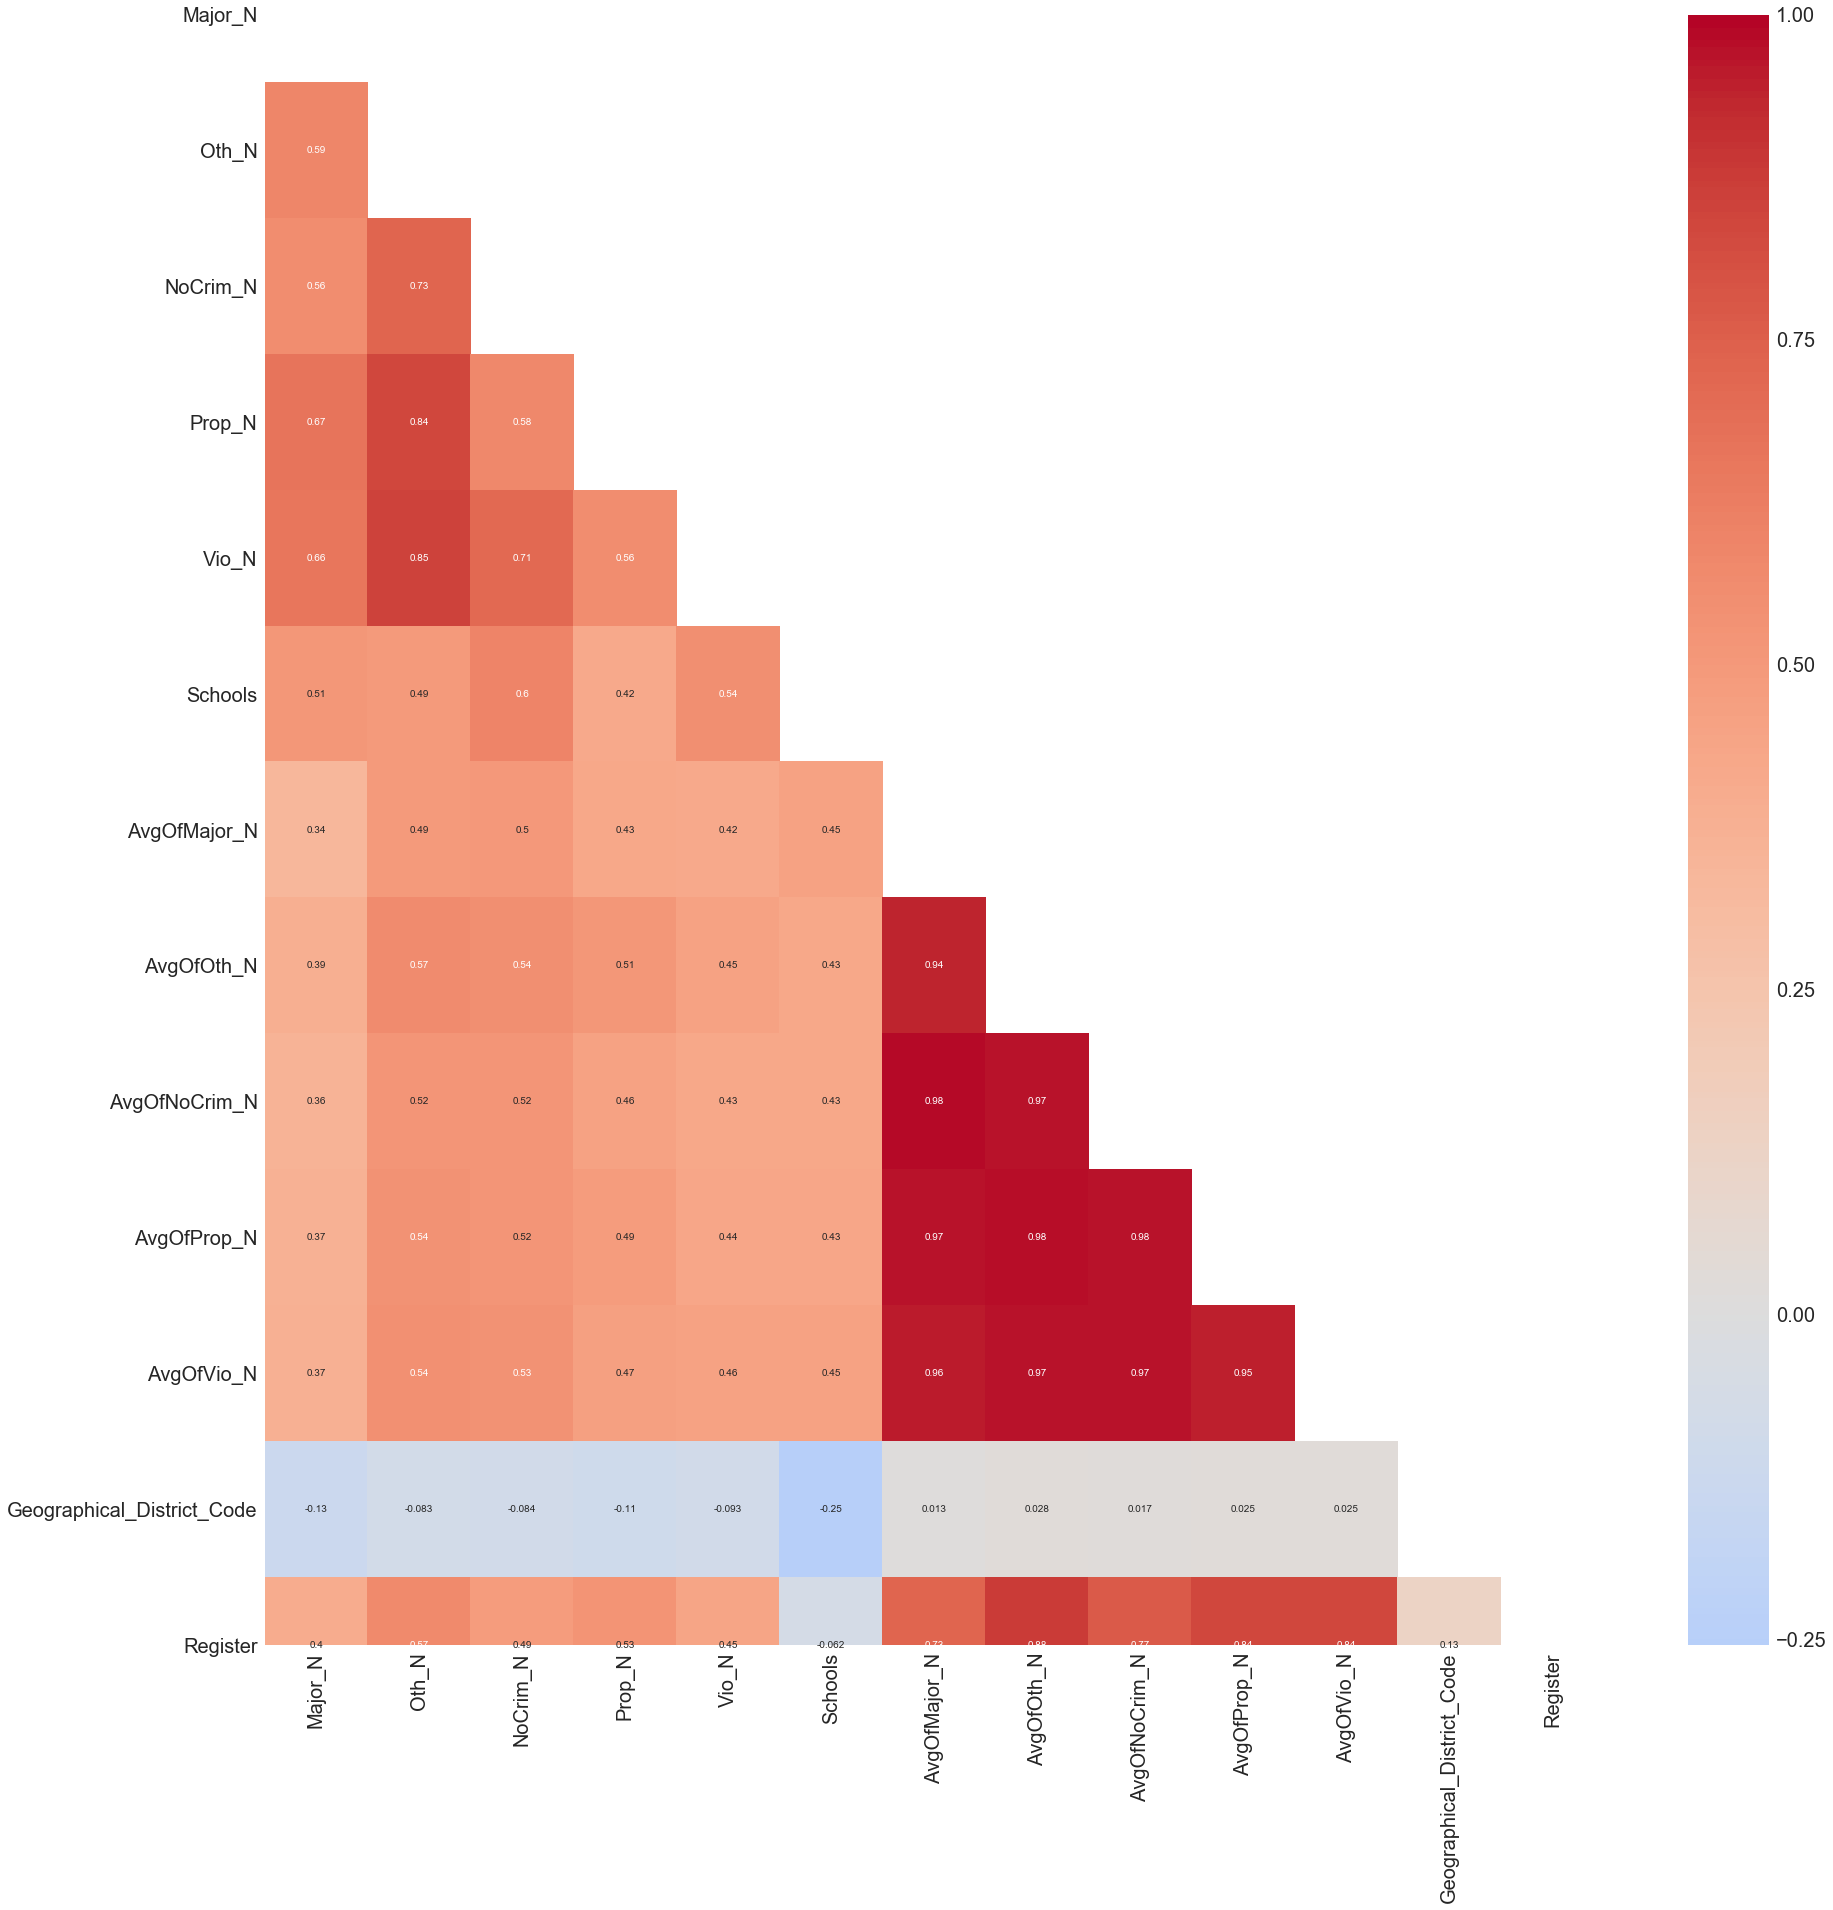

In [16]:
matrix = np.triu(ssr_num.corr())

plt.figure(figsize=(30,30))
sns.heatmap(ssr_num.corr(), center=0, cmap='coolwarm', annot=True, mask=matrix)
#plt.show()

From the heatmap it appears that Property crimes(Prop_N) and Violent crimes (Vio_N) have strong correlation with Other crimes(Oth_N) 

# Step 9

Visualizing feature analysis by Comparing variables against different Boroughs

In [17]:
from yellowbrick.style import set_palette
set_palette('sns_bright')

#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [18]:
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island', 'Other']
num_features = ['Major_N', 'Oth_N', 'NoCrim_N', 'Vio_N', 'Prop_N']

In [19]:
# copy data to a new dataframe

data_norm = ssr.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (ssr[feature] - ssr[feature].mean(skipna=True)) / (ssr[feature].max(skipna=True) - ssr[feature].min(skipna=True))




In [20]:
# Extract the numpy arrays from the data frame


X = data_norm[num_features].values
y = ssr.Borough.values

In [21]:
# Instantiate the visualizer


visualizer = ParallelCoordinates(classes=classes, features=num_features)




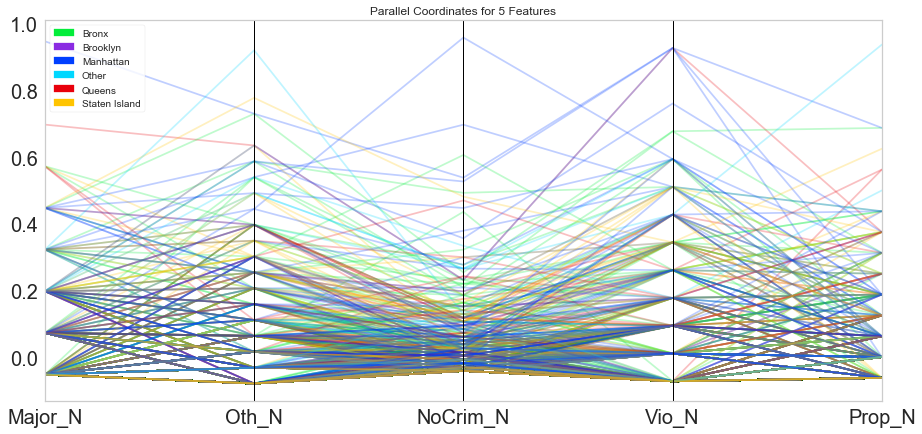

In [22]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()   
plt.show();



# Step 10

Visualizing stacked bar plots to compare crimes in each Borough 

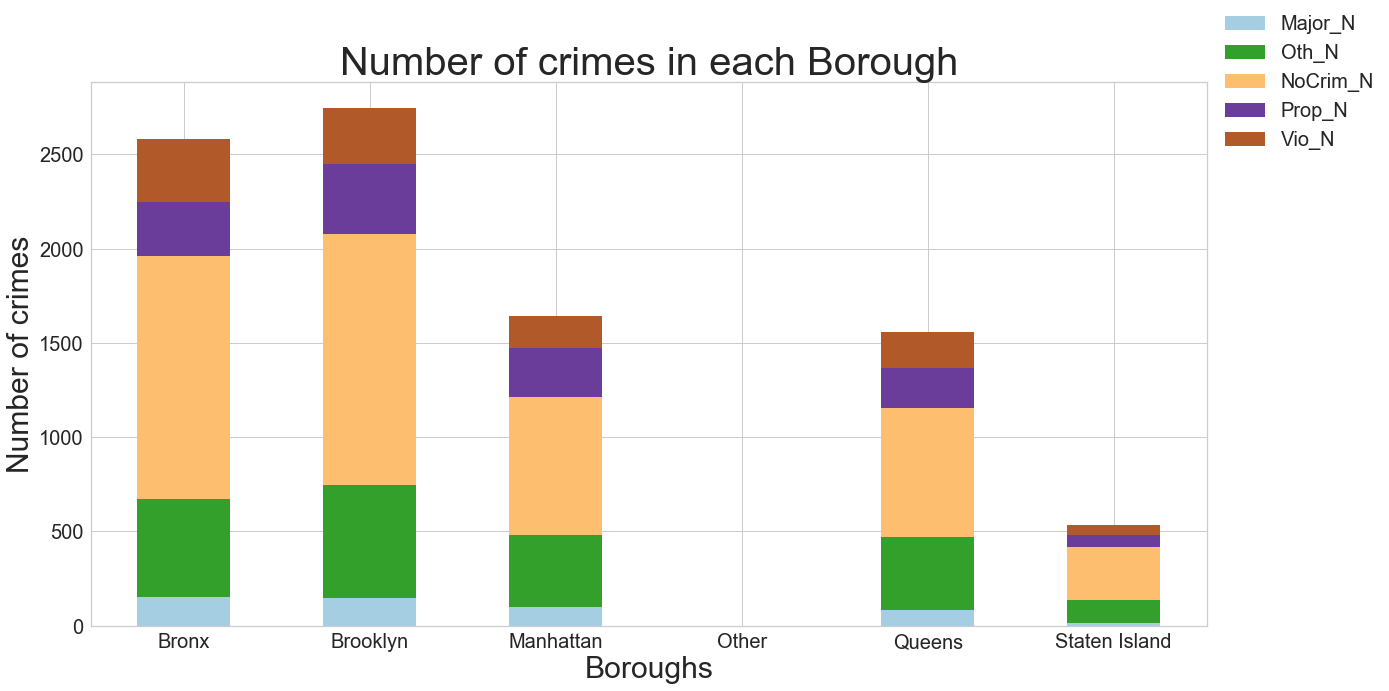

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)

s = ssr.groupby(['Borough'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N' ].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.title('Number of crimes in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

# Step 11

Handling missing values and eliminating features 

Removing unwanted features  

In [24]:
ssr = ssr.drop(['NYPD_Site_Code', 'NYPD_Site_Name', 'Location_Name', 'Location_Code', 'Building_Name', 'Latitude', 'Longitude', 'Community_Board', 'Council_District', 'Geocode', 'Postcode', 'Census_Tract', 'BIN', 'BBL','NTA'], axis=1)



Dropping 'Other' Borough in the 'Borough' column which looks like it is an outlier

In [25]:
ssr = ssr[ssr.Borough != 'Other']

Instead of filling in missing values, I chose to drop N/A values as I think it is the best thing to do in this scenario

Cleaning data - Deleting rows with N/A values and resetting the indexes

In [26]:
ssr = ssr.dropna()
ssr.reset_index(drop=True, inplace=True)


print("\nNumber of Rows in cleaned dataset 2: ", len(ssr.axes[0]))
print("Number of Columns in cleaned dataset 2: ", len(ssr.axes[1]))






Number of Rows in cleaned dataset 2:  1206
Number of Columns in cleaned dataset 2:  18


Checking datatypes

In [27]:
print(ssr.dtypes)



School_Year                    object
Borough                        object
Geographical_District_Code      int64
Register                      float64
Schools                         int64
Schools_in_Building            object
Major_N                       float64
Oth_N                         float64
NoCrim_N                      float64
Prop_N                        float64
Vio_N                         float64
ENGroupA                       object
RangeA                         object
AvgOfMajor_N                  float64
AvgOfOth_N                    float64
AvgOfNoCrim_N                 float64
AvgOfProp_N                   float64
AvgOfVio_N                    float64
dtype: object


# Step 12 

Adjust skewed data of 'Register' column

In [28]:
def log_transformation(ssr):
    return ssr.apply(np.log1p)

In [29]:
ssr['Register_log'] = log_transformation(ssr['Register'])





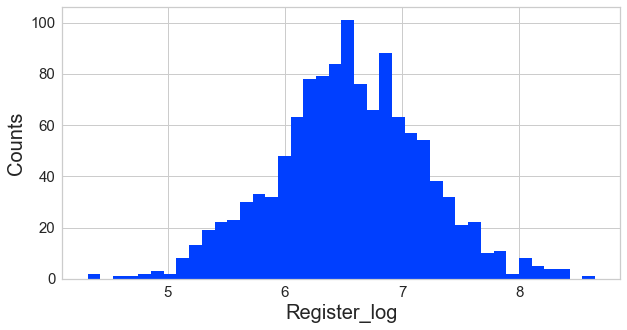

In [30]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(ssr['Register_log'], bins=40)
plt.xlabel('Register_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

# Step 13

Converting categorical data to numbers

In [31]:
# One Hot encoding of the 'Borough' column

cat_Borough = pd.get_dummies(ssr.Borough)
print(cat_Borough.head(8))



   Bronx  Brooklyn  Manhattan  Queens  Staten Island
0      0         1          0       0              0
1      0         0          0       1              0
2      0         1          0       0              0
3      0         0          1       0              0
4      0         0          1       0              0
5      0         0          1       0              0
6      0         1          0       0              0
7      0         1          0       0              0


# Step 14

Creating a features dataset to train and validate a model

In [136]:
features_model = ['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N', 'Register_log']


In [137]:
ssr_model_X = ssr[features_model]


In [138]:
ssr_model_y = ssr['Borough']



In [139]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(ssr_model_X, ssr_model_y, test_size =0.3, random_state=10)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('Boroughs in the training set:')
print(y_train.value_counts())

print('\n')
print('Boroughs in the validation set:')
print(y_val.value_counts())



No. of samples in training set:  844
No. of samples in validation set: 362


Boroughs in the training set:
Brooklyn         269
Queens           213
Bronx            169
Manhattan        138
Staten Island     55
Name: Borough, dtype: int64


Boroughs in the validation set:
Brooklyn         112
Queens            92
Bronx             72
Manhattan         70
Staten Island     16
Name: Borough, dtype: int64


# Step 15

In [140]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC



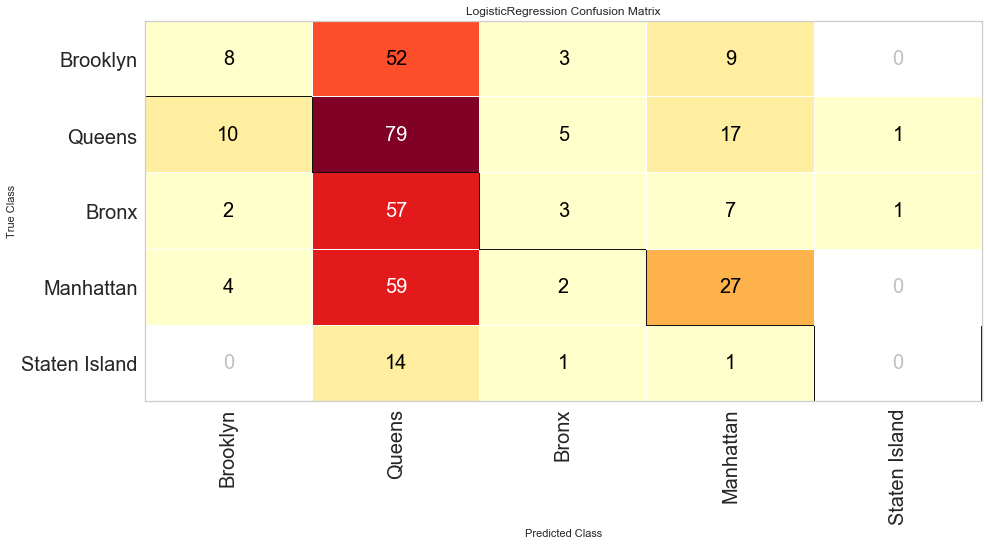

In [141]:

# Instantiate the classification model 
model = linear_model.LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20



Comparing the train and test set accuracy of multi-classification model

In [142]:
from sklearn import metrics
from sklearn import linear_model
 
# Train multinomial logistic regression model
mul_cm = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
    
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, cm.predict(X_train)))
print("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_val, cm.predict(X_val)))
    
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_cm.predict(X_train)))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_val, mul_cm.predict(X_val)))
 

Logistic regression Train Accuracy ::  0.3400473933649289
Logistic regression Test Accuracy ::  0.32320441988950277
Multinomial Logistic regression Train Accuracy ::  0.3424170616113744
Multinomial Logistic regression Test Accuracy ::  0.3287292817679558


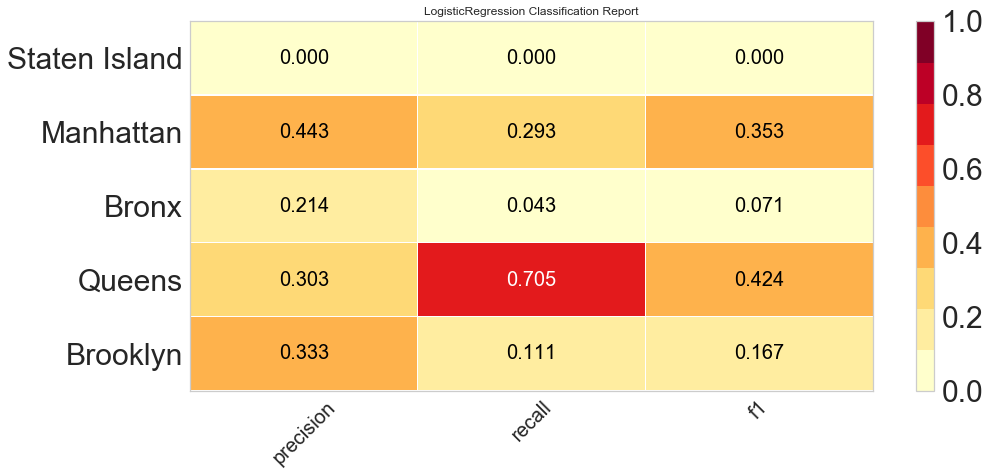

In [143]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()



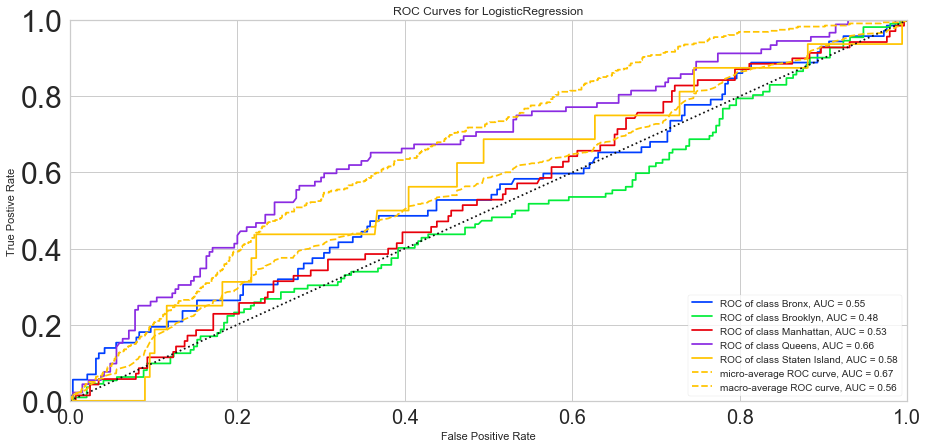

In [144]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()




# Additional visualizations

Visualizing the 'Major_N' crimes in each Borough

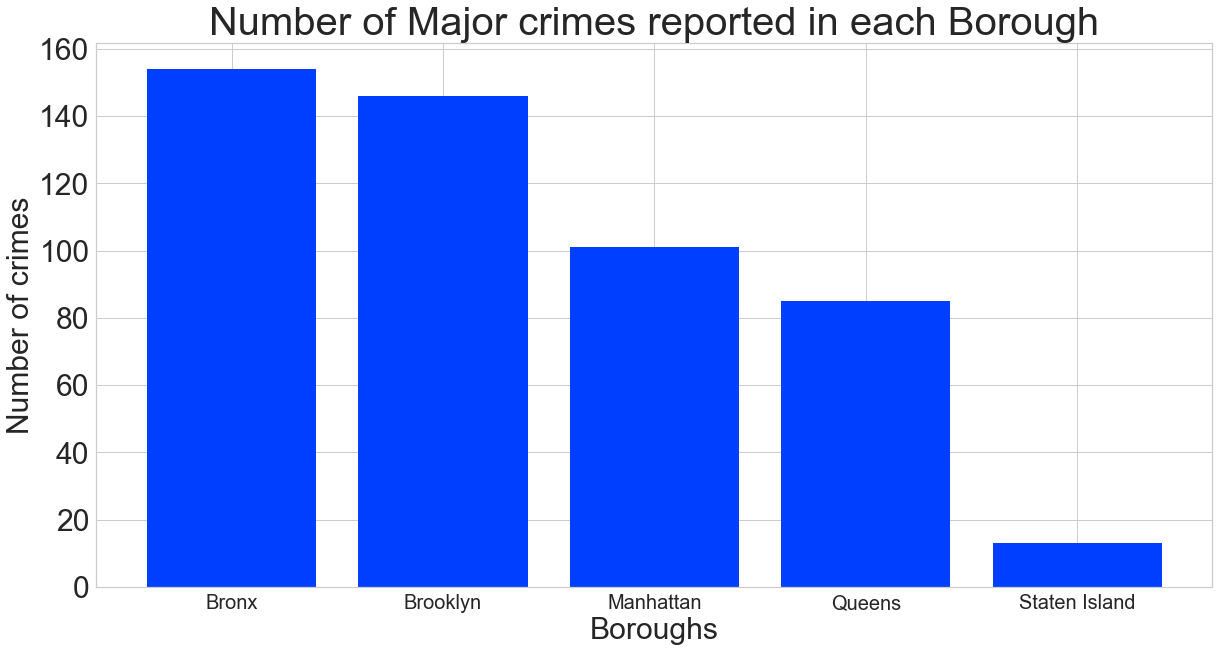

In [43]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['Major_N']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of Major crimes reported in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Visualizing the 'Oth_N' crimes in each Borough

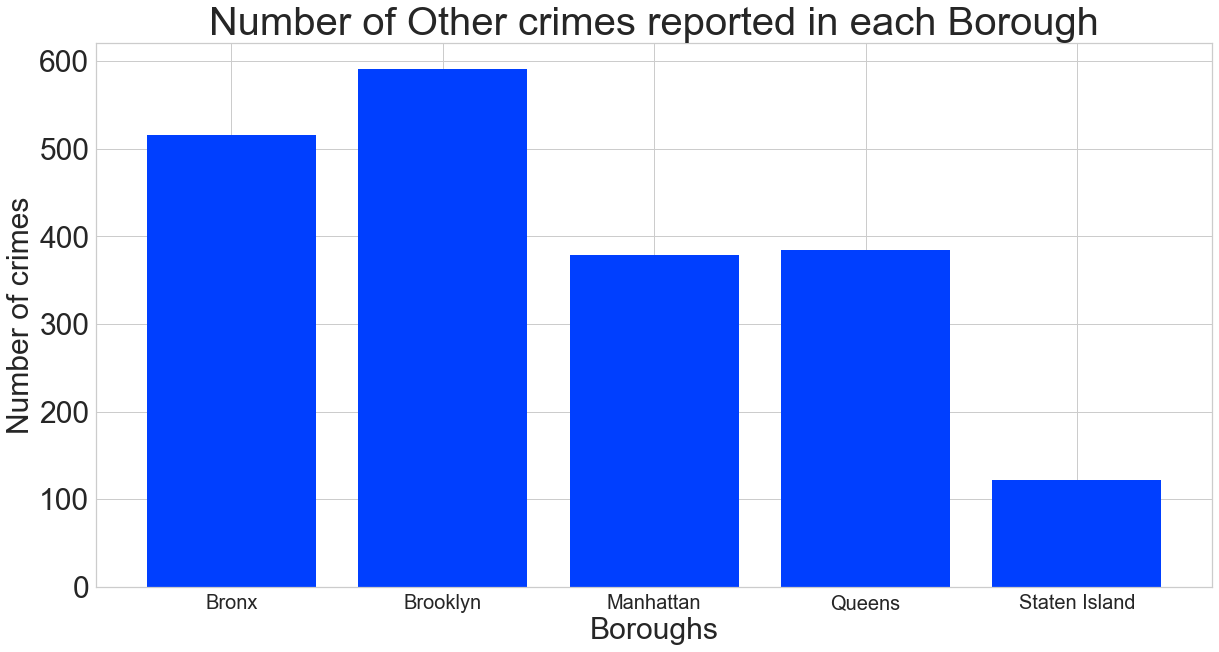

In [44]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['Oth_N']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of Other crimes reported in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Visualizing the 'NoCrim_N' crimes in each Borough

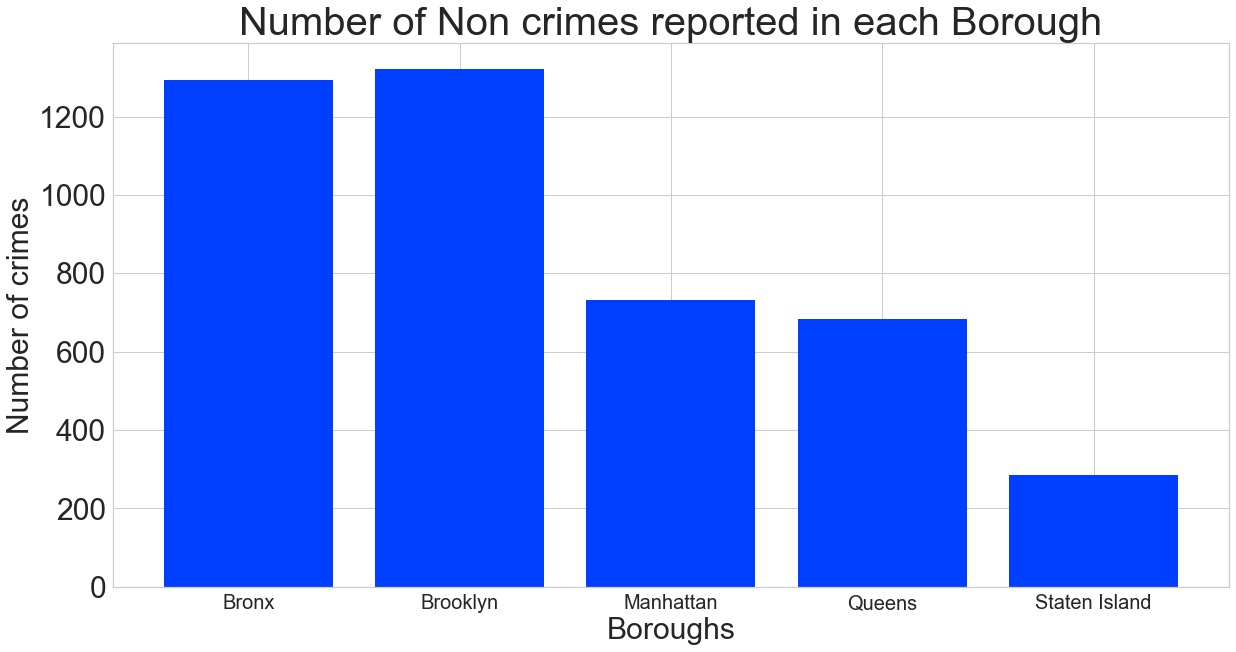

In [45]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['NoCrim_N']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of Non crimes reported in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Visualizing the 'Prop_N' crimes in each Borough

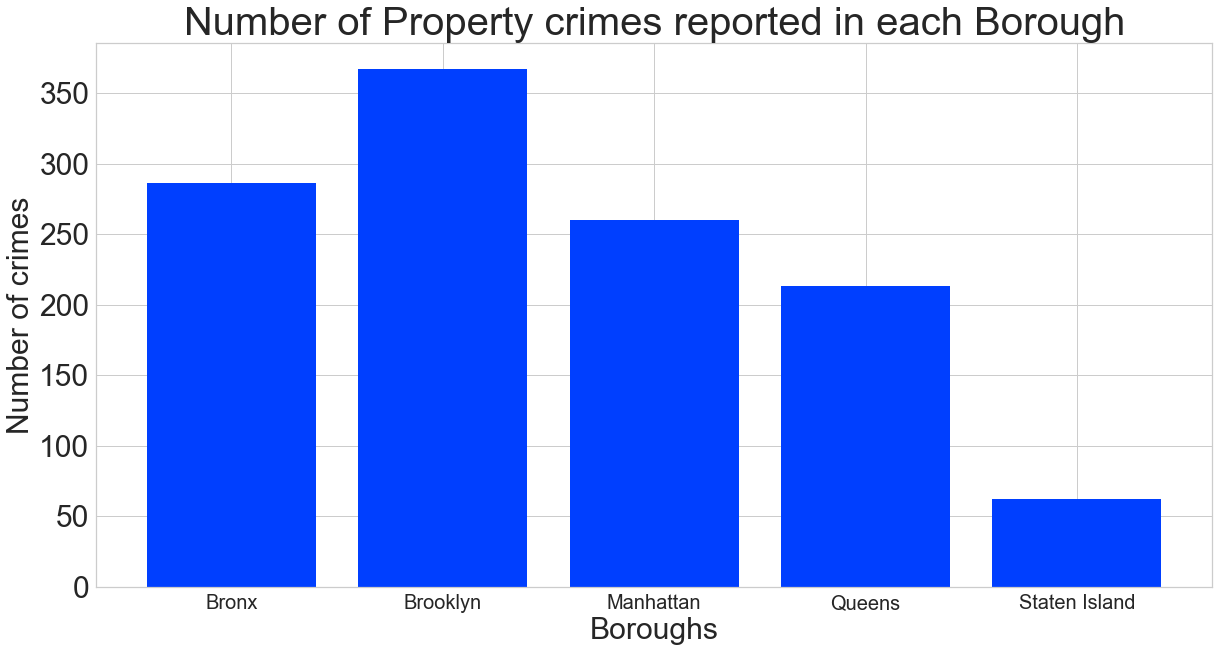

In [46]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['Prop_N']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of Property crimes reported in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Visualizing the 'Vio_' crimes in each Borough

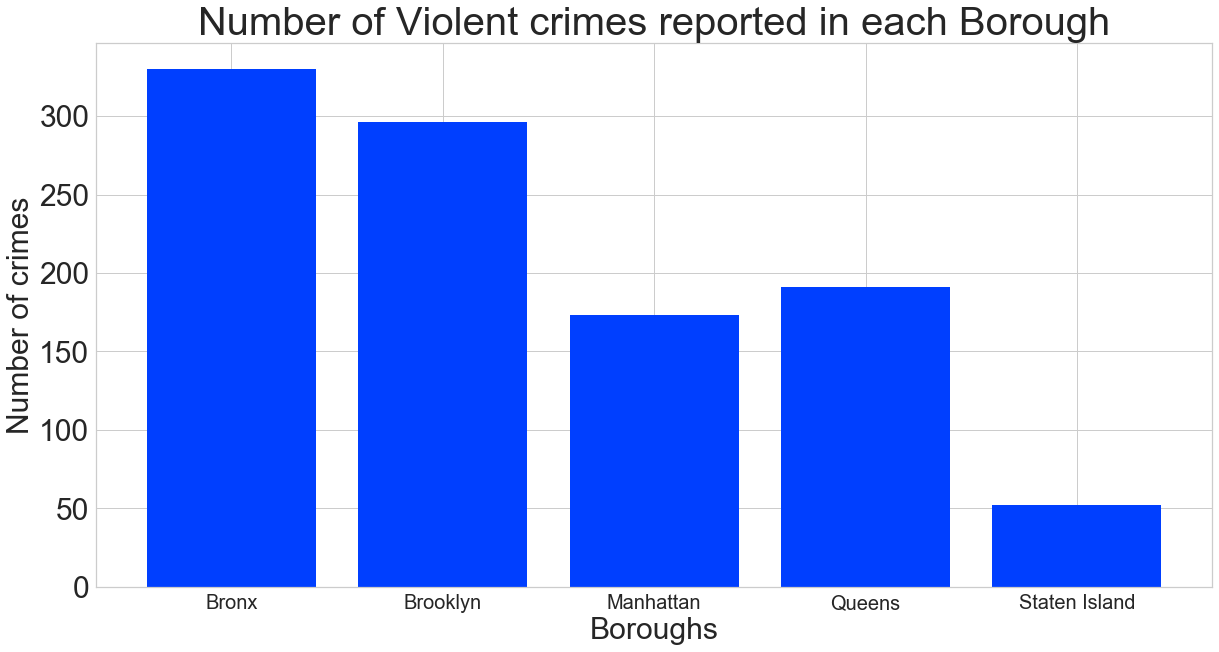

In [47]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['Vio_N']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of Violent crimes reported in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Visualizing the 'Register' in each Borough

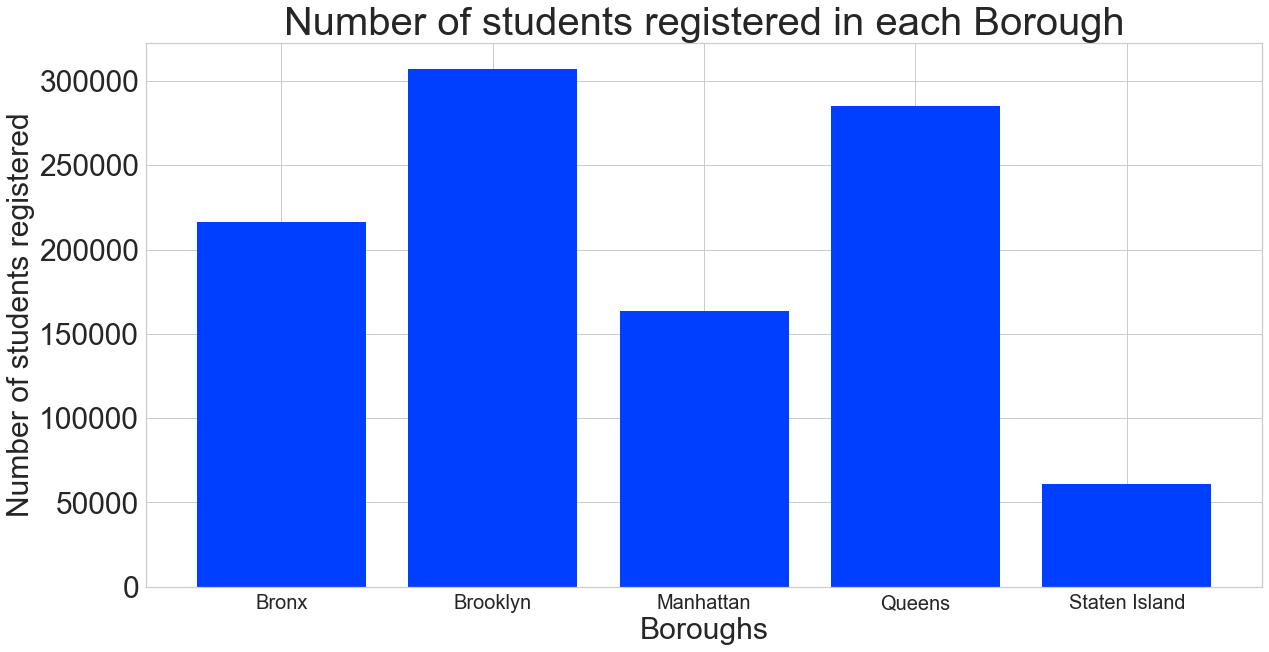

In [48]:
keys = sorted(ssr['Borough'].unique())
vals = []
for a in keys:
    vals.append(sum(ssr.loc[ssr['Borough'] == a]['Register']))

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(keys, vals)
plt.title('Number of students registered in each Borough', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of students registered', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()